### Title: Exercice 3.2
### Author: Jerock Kalala
### Date: September 18th 2022
### Professor: Dr. Brett Werner
### Mathematical and Python Functions

##### (a) Import the data and create two new columns. Create one column that is the number of years since 1790. Create another column that is the population in millions.

In [73]:
#locate the data file
file_loc = "E:\\Bellevue\\Fall_2022\\DSC_320_Math for Data Science\\Week_3\week3data\\us_pop_data.csv"

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy import stats

#read the file
data = pd.read_csv(file_loc)
#renaming the column
#data.rename(columns = {'year':'Year', 'us_pop':'US_Population'}, inplace = True)
#Refinine colunms
data['Number_of_years'] = data.year - 1790
data['Population_in_Million'] = data.us_pop / 1000000
data['Population_in_Million'] = data['Population_in_Million'].astype(float)
#data.style.format({'Population_in_Million': '{0:,.2f}','us_pop': '{0:,.0f}'})#formats pop columns
pd.set_option('display.float_format', '{:.2f}'.format)
print(data)



    year     us_pop  Number_of_years  Population_in_Million
0   1790    3929326                0                   3.93
1   1800    5308483               10                   5.31
2   1810    7239881               20                   7.24
3   1820    9638453               30                   9.64
4   1830   12866020               40                  12.87
5   1840   17069453               50                  17.07
6   1850   23191876               60                  23.19
7   1860   31443321               70                  31.44
8   1870   39818449               80                  39.82
9   1880   50189209               90                  50.19
10  1890   62947714              100                  62.95
11  1900   76212168              110                  76.21
12  1910   92228496              120                  92.23
13  1920  106021537              130                 106.02
14  1930  122775046              140                 122.78
15  1940  132164569              150    

##### (b) Plot the US population (in millions) versus the years since 1790

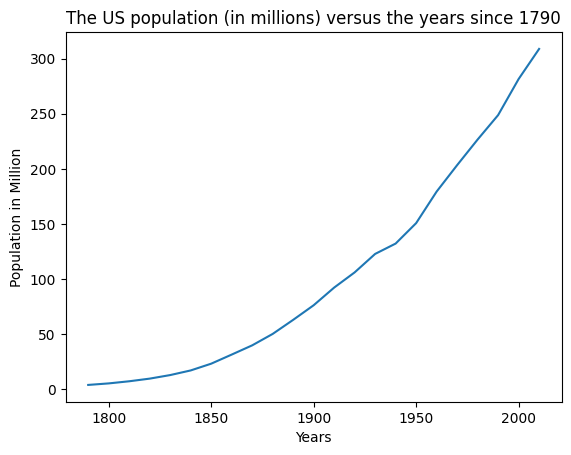

In [119]:
x = data.Year
y = data.Population_in_Million
#Label X and Y axis and the title
plt.xlabel('Years')
plt.ylabel('Population in Million')
plt.title('The US population (in millions) versus the years since 1790')
#plot
plt.plot(x, y)

##### (c) Create a linear regression model to predict the US population (in millions) t years from 1790. Find and report the R2-value of this model.

In [125]:
from sklearn.linear_model import LinearRegression

#initialisation
xp = data.Number_of_years
yp = data.Population_in_Million
#Finding of the rvalue
result = stats.linregress(xp, yp)
print("Here we go:\n", result)

#Getting and squaring the rvalue to get r-squared = coefficient of determination
rsquare = result.rvalue **2
print('\nThe Coefficient of Determination (R-Squared) is: ', '{:.5f}%'.format(rsquare))
print('{:.1f}%'.format(rsquare*100),' of the variation in y (population) is explained by the variation in x (years) while', '{:.2f}%'.format(100-(rsquare*100)),'is unexplained.')

Here we go:
 LinregressResult(slope=1.3596248380434783, intercept=-45.5678760978261, rvalue=0.9587719982915877, pvalue=5.993105541303992e-13, stderr=0.08793913449878463, intercept_stderr=11.29598635403403)

The Coefficient of Determination (R-Squared) is:  0.91924%
91.9%  of the variation in y (population) is explained by the variation in x (years) while 8.08% is unexplained.


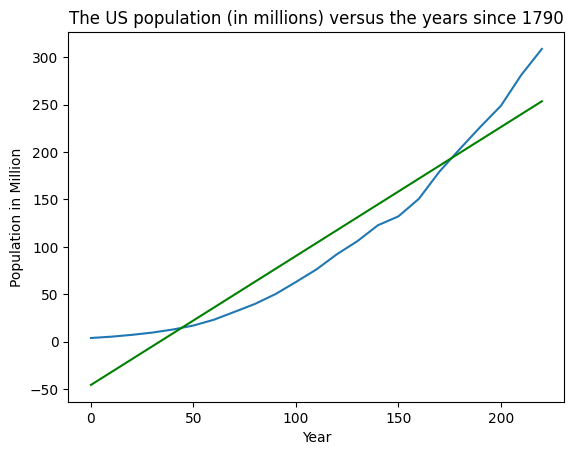

In [126]:
# y =mx=b
x1 = xp
#x = data.Population_in_Million
y1 = yp
m, b = result.slope, result.intercept
plt.plot(x1,y1)
plt.xlabel('Year')
plt.ylabel('Population in Million')
plt.title('The US population (in millions) versus the years since 1790')
plt.plot(x1, m*x1+b, color = 'g')


##### (d) Create another new column in your data by squaring the number of years since 1790.

In [77]:
#Create a new field
data['Ysquare'] = data.Number_of_years**2

#remane columns
data.rename(columns = {'year':'Year', 'us_pop': 'Us_Pop'}, inplace=True)

print(data)

    Year     Us_Pop  Number_of_years  Population_in_Million  Ysquare
0   1790    3929326                0                   3.93        0
1   1800    5308483               10                   5.31      100
2   1810    7239881               20                   7.24      400
3   1820    9638453               30                   9.64      900
4   1830   12866020               40                  12.87     1600
5   1840   17069453               50                  17.07     2500
6   1850   23191876               60                  23.19     3600
7   1860   31443321               70                  31.44     4900
8   1870   39818449               80                  39.82     6400
9   1880   50189209               90                  50.19     8100
10  1890   62947714              100                  62.95    10000
11  1900   76212168              110                  76.21    12100
12  1910   92228496              120                  92.23    14400
13  1920  106021537              1

##### (e) Run another linear regression, where your input feature is the square of the number of years since 1790. Find and report the R2-value of this model.

In [105]:
from sklearn.linear_model import LinearRegression

#initialisation
xp1 = data.Ysquare
yp1 = data.Population_in_Million
#Finding of the rvalue
result2 = stats.linregress(xp1, yp1)
print("Here we go:\n", result)

#Getting and squaring the rvalue to get r-squared = coefficient of determination
rsquare2 = result2.rvalue **2
print('\nThe Coefficient of Determination (R-Squared) is: ', '{:.5f}%'.format(rsquare2))
print('{:.1f}%'.format(rsquare2*100),' of the variation in y (population) is explained by the variation in x (years) while', '{:.2f}%'.format(100-(rsquare2*100)),'is unexplained.')

Here we go:
 LinregressResult(slope=0.6761010235962227, intercept=1829.6916757549611, rvalue=0.9587719982915877, pvalue=5.993105541303992e-13, stderr=0.04372951801494884, intercept_stderr=6.131870985738276)

The Coefficient of Determination (R-Squared) is:  0.99849%
99.8%  of the variation in y (population) is explained by the variation in x (years) while 0.15% is unexplained.


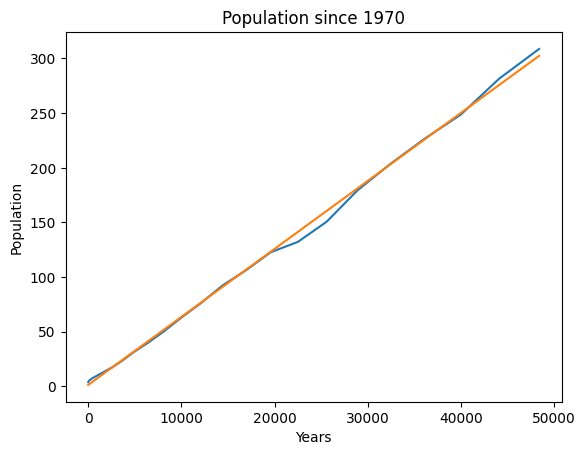

In [128]:
x, y, m, b = xp1, yp1, result2.slope, result2.intercept
#plot label thes axis and title the plot
plt.plot(xp1, yp1)
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population since 1970')
plt.plot(xp1, m*x+b)

##### (f) Plot the models you built on top of the data. Which one fits the data better? Is this apparent in your R2-values. Explain.

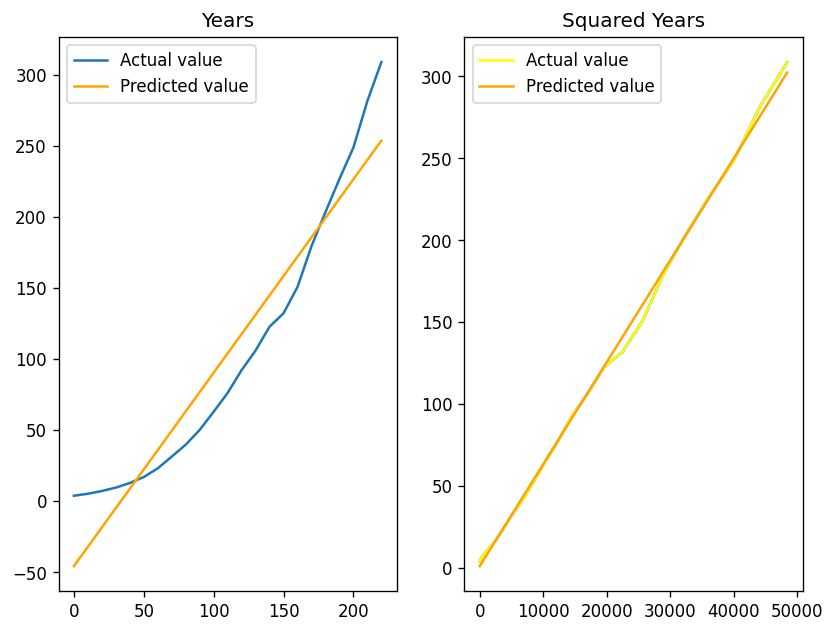

For Years, the R-squared-value ist:  0.91924%
For Squared Years, the R-squared-value ist:  0.99849%
From that, we clearly se that the value of the squared years fits the best because is close to one. 


In [138]:
fig,(fa1, fa2) = plt.subplots (1, 2, figsize=(8, 6), dpi=120)

#first plot
x, y, m, b = x1, y1, result.slope, result.intercept
fa1.plot(x1, y1, label='Actual value')
fa1.plot(x1,m*x+b, color='orange', label='Predicted value')
fa1.title.set_text('Years')
fa1.legend()

#second plot
x, y, m, b = xp1, yp1, result2.slope, result2.intercept
#plot label thes axis and title the plot
plt.plot(xp1, yp1)
fa2.plot(xp1, yp1, color = 'blue', label='Actual value')
fa2.plot(xp1,m*x+b, color="orange", label='Predicted value') #plotting regression line
fa2.legend()
fa2.title.set_text('Squared Years')
plt.show()

print("For Years, the R-squared-value ist: ", '{:.5f}%'.format(rsquare))
print("For Squared Years, the R-squared-value ist: ", '{:.5f}%'.format(rsquare2))
print("From that, we clearly se that the value of the squared years fits the best because is close to one. ")